### Ella Rigoli & Karen Zhang
September 23, 2024

Computational Analysis of Big Data C


# Assignment 1:
Make sure you run your code before saving and submitting so that the output can be easily checked. Sometimes you might need to include chunks of code or a copy of your data set. Just make sure it runs (you can make sure that it runs by pressing the 'run all' command)

## Week 1
> `Exercise 1.3`
> 
> 1. Write a function called `count_danish_chars` that takes a string (city name) and returns the count of Danish special characters (æ, ø, å) or their representations (ae, oe, aa). Feel free to use [regular expressions](https://www.w3schools.com/python/python_regex.asp) if you know how.
> 2. Use the `.map()` function to apply `count_danish_chars` to the index of the DataFrame. Assign the result to a new column called `danishness`.
> 3. Which city has the highest `danishness` score? What is the fraction of Danish cities that don't have any Danish Characters or representations? What is the distribution of `danishness`?

In [1]:
# week1 exercise 1.3

import pandas as pd
import numpy as np

df = pd.read_csv('danish_cities.csv', index_col = 0)


def count_danish_chars(string):
    danish_chars = "æøå"
    representations = ['ae', 'oe', 'aa']
    # count danish characters
    count = sum(1 for char in string.lower() if char in danish_chars)
    # count danish character representations
    for rep in representations:
        count += string.lower().count(rep)
    return count

# use map function to apply count_danish_char to index (cities)
df['danishness'] = df.index.map(count_danish_chars)
display(df)

# determine city with highest danishness score
df.sort_values(by='danishness', ascending = False, inplace = True)
print('city with highest danishness score: \n', df.head(1), '\n')
# determine fraction of cities with no danish characters/representations
print('fraction of cities without Danish characters: ', (len(df[df['danishness'] == 0])/len(df)), '\n')
# get distribution of danishness
print('distribution of Danishness: \n', df['danishness'].value_counts())

,lat,lng,admin_name,population,danishness
city,,,,,
Copenhagen,55.6761,12.5683,Hovedstaden,1366301.0,0
Aarhus,56.1572,10.2107,Midtjylland,285273.0,1
Odense,55.3958,10.3886,Syddanmark,180863.0,0
Aalborg,57.0500,9.9167,Nordjylland,143598.0,1
Esbjerg,55.4833,8.4500,Syddanmark,72261.0,0
...,...,...,...,...,...
Ærøskøbing,54.8912,10.4083,Syddanmark,NaN,3
Grindsted,55.7540,8.9123,Syddanmark,NaN,0
Højby,55.9115,11.5976,Sjælland,NaN,1


city with highest danishness score: 
                 lat      lng  admin_name  population  danishness
city                                                            
Ærøskøbing  54.8912  10.4083  Syddanmark         NaN           3 

fraction of cities without Danish characters:  0.6104651162790697 

distribution of Danishness: 
 danishness
0    105
1     60
2      6
3      1
Name: count, dtype: int64


> `Exercise 1.5`
> 1. Using your `df` DataFrame from exercise 1.3 group the cities by the `admin_name` attribute and list the both total population for each administrative area and their percentage of the total population in Denmark (you can find on Google). Which administrative area has the most cities?
> 2. Determine the city with the largest population in each administrative area as well as the average latitude (`lat`) and longitude (`lng`) for the cities in each area. Does the centerpoint for each area hit water, forest, field or city on Google Maps? Simply write the latitude and longitude into the search bar. Example using Copenhagen (55.6761, 12.5683) in Google Maps [here](https://www.google.com/maps/place/55°40'34.0%22N+12°34'05.9%22E/@55.676103,12.5657251,17z/data=!3m1!4b1!4m4!3m3!8m2!3d55.6761!4d12.5683?entry=ttu).
> 3. Using the combined data set `df_dropped`, make a new column `density` based on `area_km2` and `population`. Group the cities by `admin_name` and compare the density statistics (using aggregation functions) across different `admin_name` statuses to determine if there's a noticeable difference in density between regions. What are the 3 most dense cities in each region?
> 4. Which administrative area has the most diversity in terms of area_km2, population, density? Which area is the most Danish, based on `danishness`?

#### Helping code

In [2]:
# week1 exercise 1.4
df = pd.read_csv('danish_cities.csv', index_col = 0)
df_areas = pd.read_csv('danish_areas.csv', index_col = False)
df_areas = df_areas.rename(columns={'Municipality': 'city'})
df_areas = df_areas.set_index('city')

df_combined = df.join(df_areas, how = 'left')

# count number of cities with missing areas
missing_area = df_combined['area_km2'].isnull().sum()

# create df_dropped where all rows containing any missing values have been removed
df_dropped = df_combined.dropna()

#### 1.5 Answer

In [3]:
# week1 exercise 1.5
df = df.reset_index()

# 1
# list the population, number of cities, and percentage of Denmark's population for admin areas
denmark_pop = 5981460
df_grouped = df.groupby('admin_name').agg({'population': 'sum', 'city': 'count'})
df_grouped['percentage'] = (df_grouped['population'] / denmark_pop) * 100
print(df_grouped, '\n')

# 2
# list the largest city in each admin area
largest_city = df.loc[df.groupby('admin_name')['population'].idxmax()]
print(largest_city, '\n')
# list the average lat and lng for each admin area
df_grouped1 = df.groupby('admin_name').agg({'lat': 'mean', 'lng': 'mean'})
print(df_grouped1, '\n')

# 3
# get densities of each city
df_dropped['density'] = df_dropped['population'] / df_dropped['area_km2']
# compare density stats of each admin area
density_stats = df_dropped.groupby('admin_name').agg({'density': ['mean', 'min', 'max', 'std']})
display(density_stats)
# get 3 most dense cities in each admin area
most_dense = df_dropped.groupby('admin_name').apply(lambda x: x.nlargest(3, 'density'))
display(most_dense)

# 4
# calculate diversity of each admin area across 3 categories using std
diversity = df_dropped.groupby('admin_name').agg({'area_km2': 'std', 'population': 'std', 'density': 'std'})
# get most diverse area for area_km2, population, and density
most_diverse = diversity.idxmax()
display(most_diverse)
# determine which admin area is most danish
df_dropped['danishness'] = df_dropped.index.map(count_danish_chars)
area_danishness = df_dropped.groupby('admin_name')['danishness'].sum()
display(area_danishness)

             population  city  percentage
admin_name                               
Hovedstaden   1759215.0    42   29.411130
Midtjylland    842787.0    39   14.089988
Nordjylland    341721.0    22    5.713003
Sjælland       426601.0    33    7.132055
Syddanmark     681627.0    36   11.395663 

         city      lat      lng   admin_name  population
0  Copenhagen  55.6761  12.5683  Hovedstaden   1366301.0
1      Aarhus  56.1572  10.2107  Midtjylland    285273.0
3     Aalborg  57.0500   9.9167  Nordjylland    143598.0
9    Roskilde  55.6500  12.0833     Sjælland     51916.0
2      Odense  55.3958  10.3886   Syddanmark    180863.0 

                   lat        lng
admin_name                       
Hovedstaden  55.767064  12.508174
Midtjylland  56.186495   9.714026
Nordjylland  57.065741   9.874800
Sjælland     55.410248  11.778233
Syddanmark   55.324542   9.812500 



/var/folders/qm/s2yp5j6x5bn78w67r9xsznnc0000gn/T/ipykernel_57243/2335028428.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['density'] = df_dropped['population'] / df_dropped['area_km2']


density                                      
                    mean        min           max          std
admin_name                                                    
Hovedstaden  2669.755993  68.218623  15777.147806  5802.313073
Midtjylland    91.949215  13.794749    609.818298   157.971669
Nordjylland    44.530079  12.596856    126.273303    46.534369
Sjælland       81.552614  25.937095    245.002360    72.096588
Syddanmark     93.882585   6.001716    591.635590   150.835177

lat      lng   admin_name  population  \
admin_name  city                                                       
Hovedstaden Copenhagen     55.6761  12.5683  Hovedstaden   1366301.0   
            Hørsholm       55.8803  12.5081  Hovedstaden     47680.0   
            Dragør         55.5833  12.6667  Hovedstaden     12401.0   
Midtjylland Aarhus         56.1572  10.2107  Midtjylland    285273.0   
            Horsens        55.8583   9.8500  Midtjylland     61074.0   
            Randers        56.4570  10.0390  Midtjylland     62802.0   
Nordjylland Aalborg        57.0500   9.9167  Nordjylland    143598.0   
            Frederikshavn  57.4410  10.5340  Nordjylland     23501.0   
            Hjørring       57.4636   9.9814  Nordjylland     25764.0   
Sjælland    Roskilde       55.6500  12.0833     Sjælland     51916.0   
            Køge           55.4561  12.1797     Sjælland     38304.0   
            Ringsted       55.4425  11.7900     Sjælland     23086.0   
Syddanmark  Odense         55.3958  10.3886   Syddanmark    180863.0   
            Fredericia     55.5667   9.7500   Syddanmark     40886.0   
            Kolding        55.4917   9.5000   Syddanmark     61638.0   

                           area_km2  population_2012       density  
admin_name  city                                                    
Hovedstaden Copenhagen         86.6         549050.0  15777.147806  
            Hørsholm           31.3          24365.0   1523.322684  
            Dragør             18.3          13692.0    677.650273  
Midtjylland Aarhus            467.8         314545.0    609.818298  
            Horsens           519.8          83598.0    117.495190  
            Randers           747.6          95756.0     84.004815  
Nordjylland Aalborg          1137.2         201142.0    126.273303  
            Frederikshavn     650.3          61158.0     36.138705  
            Hjørring          926.2          66178.0     27.816886  
Sjælland    Roskilde          211.9          83137.0    245.002360  
            Køge              256.5          57307.0    149.333333  
            Ringsted          294.6          33153.0     78.363883  
Syddanmark  Odense            305.7         191610.0    591.635590  
            Fredericia        133.6          50193.0    306.032934  
            Kolding           607.1          89412.0    101.528578

area_km2       Syddanmark
population    Hovedstaden
density       Hovedstaden
dtype: object

/var/folders/qm/s2yp5j6x5bn78w67r9xsznnc0000gn/T/ipykernel_57243/2335028428.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['danishness'] = df_dropped.index.map(count_danish_chars)


admin_name
Hovedstaden    4
Midtjylland    1
Nordjylland    3
Sjælland       4
Syddanmark     4
Name: danishness, dtype: int64

## Week 2

> `Exercise 2.1`:
>
> 2. Group the combined DataFrame `df_decades` by the Decade column and call the resulting DataFrame `df_decades_grouped`. For each decade, identify and display the artist with the highest commercial success based on the provided `CSPC` metric. **Hint:** if you get stuck you can use the `idxmax()` function.
> 3. Use the `.bar()` from `matplotlib.pyplot` to create a barplot that displays the number of sales for each decade. Remember to include a suitable title and label the axes. **Extra Credit**: Overlay the bar chart with a horizontal line representing the percentage of sales attributable to the top five best-selling artists of each decade. You should plot the percentage above the line as text. What insights can you derive from this value?


            artist     sales decade
0        Metallica  12513000    00s
1  Backstreet Boys  19536000    00s
2      James Blunt  23920000    00s
3             2Pac  16533000    00s
4      Norah Jones  50334000    00s
              artist      sales decade
41            Eminem  138676000    00s
90      Taylor Swift  113696000    10s
121        Bad Bunny   46027000    20s
159          Beatles  390857000    60s
203       Pink Floyd  174538000    70s
248  Michael Jackson  184775000    80s
276      Celine Dion  162565000    90s


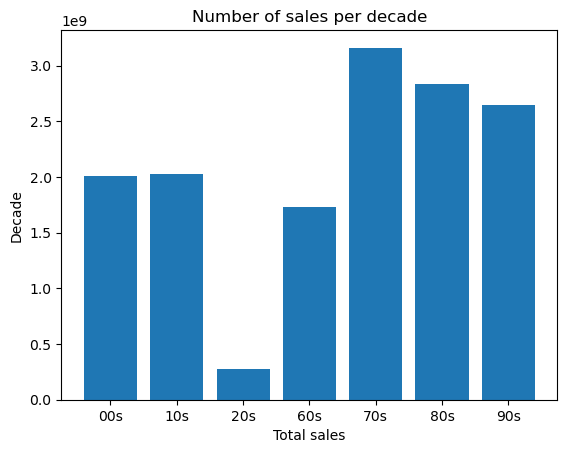

number of unique artists in data_cspc folder: 180


In [4]:
# week2 exercise 2.1

import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files for each decade into list of DataFrames
decades = ['00s', '10s', '20s', '60s', '70s', '80s', '90s']
dfs = []

for decade in decades:
    df = pd.read_csv(f'data_cspc/data{decade}.csv', index_col = False)
    df['decade'] = decade # Add a decade column to indicate which decade the artist is from
    dfs.append(df)
    
# 2.1.1: concatenate decades' DataFrames into one DataFrame with the decades for each artist listed
df_decades = pd.concat(dfs, ignore_index= True)
print(df_decades.head())

# 2.1.2: group combined DataFrame by decade and show most successful artist for each decade 
df_decades_grouped = df_decades.loc[df_decades.groupby('decade')['sales'].idxmax()]
print(df_decades_grouped)
    
# 2.1.3: create barplot showing number of sales for each decade
sales_per_decade = df_decades.groupby('decade')['sales'].sum()
plt.bar(sales_per_decade.index, sales_per_decade.values)
plt.title('Number of sales per decade')
plt.xlabel('Total sales')
plt.ylabel('Decade')
plt.show()

# 2.1.4: create a Series with all unique artists from all decades
unique_artists = df_decades['artist'].unique()
num_artists = len(unique_artists)
print(f'number of unique artists in data_cspc folder: {num_artists}')

> `Exercise 2.4`: 
>
> 2. There are some instances where the `name` of the artist is not the same as the index. Are there any instances where we get the wrong artist from `search_for_artist`? Print both the meta data `name` and the `index` where they are different. Are all the difference due to spelling, or do some of them get the wrong artist? For each wrong artist, fix the metadata. Finally, drop the new `name` column.
> 3. Use the `.scatter()` from `matplotlib.pyplot` to show the relationship between `popularity` and `followers`. Do you notice a trend? Try log-transforming `followers` using `numpy`. Now try plotting the data again using the log-transformed `log_followers`. How do you interpret the relationship? You can use `.corr()` to get the pearson correlation between variables in a DataFrame.

#### Helping code

In [5]:
import os
import base64
import json
from dotenv import load_dotenv
from requests import post, get

# Looking for .env file and loading it
load_dotenv(dotenv_path = '/Users/karenzhang/Desktop/brandeis/abroad/bigdata/exercises/week2/.env.rtf') 

# Get the id and secret from the .env
client_id = os.getenv("CLIENT_ID" )
client_secret = os.getenv("CLIENT_SECRET")

# need to manually import due to inexplicable error
client_id = '35585037ab5e4bdfba5518491e95b785'
client_secret = '7de858b4a30c44d18f1da717dc86af6b'

def get_token(client_id, client_secret):
    # Encode the client ID and client secret
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")
    
    # Define the URL and headers for the POST request
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": f"Basic {auth_base64}",
        "Content-Type": "application/x-www-form-urlencoded"
    }
    
    # Set the data payload for the POST request
    data = {"grant_type": "client_credentials"}
    
    # Make the POST request to get the token
    result = post(url, headers=headers, data=data)
    
    # TODO: JSONify the Response object
    # parse JSON response
    result_json = result.json()
    # extract access token
    token = result_json.get("access_token")
        
    return token # Return the access token from the JSON response

# Check the token
token = get_token(client_id, client_secret)




# Function to search for an artist on Spotify
def search_for_artist(token, artist_name):
    
    # Spotify search API endpoint
    url = 'https://api.spotify.com/v1/search'
    
    # Get the Authorization header for the request
    headers = {'Authorization': f'Bearer {token}'}

    # Correctly format the query parameters with the artist_name
    # and limit the results to only one artist
    query = f"?q={artist_name}&type=artist&limit=1"
    
    # Combine the base URL with the query parameters
    query_url = url + query
    
    # Send a GET request to the Spotify API with the query URL and headers
    result = get(query_url, headers=headers)


    # TODO: JSONify the Response object
    if result.status_code == 200:
        json_result = result.json()
        # check if artists were found in the response
        if json_result['artists']['items']:
            # return first search result
            metadata_artist = json_result['artists']['items'][0]
            return metadata_artist
        else:
            raise Exception(f'Artist {artist_name} not found')
    else:
        return f"Error {result.status_code}: {result.reason}"
        
    
    # TODO: Make an Exeption for the case when the artist is not found. Hint: 
    #       Try searching for an artist you know does not exist and see what the
    #       response looks like. 

#     return json_result # Return JSON response




def get_artist_data_feature(meta_data_artist, artist_feature='name'):
    if artist_feature == 'name':
        return meta_data_artist['name']
    elif artist_feature == 'id':
        return meta_data_artist['id']
    elif artist_feature == 'genres':
        return meta_data_artist['genres']
    elif artist_feature == 'followers':
        return meta_data_artist['followers']['total']
    elif artist_feature == 'popularity':
        return meta_data_artist['popularity']
    else:
        raise ValueError("Invalid artist feature specified.")


#### 2.4 Answer

index: Rod Stewart & Faces | meta data name: Rod Stewart
index: Beyonce | meta data name: Beyoncé
index: Celine Dion | meta data name: Céline Dion
index: Usher | meta data name: USHER
index: NSYNC | meta data name: *NSYNC
index: Pink | meta data name: Pink Floyd
index: Blackpink | meta data name: BLACKPINK
index: Juice Wrld | meta data name: Juice WRLD
index: Jackson 5 & The Jacksons | meta data name: The Jackson 5
index: Rolling Stones | meta data name: The Rolling Stones
index: Crosby, Stills, Nash (& Young) | meta data name: Crosby, Stills, Nash & Young
index: Beatles | meta data name: The Beatles
index: Abba | meta data name: ABBA
index: Bob Marley | meta data name: Bob Marley & The Wailers
index: George Michael & Wham! | meta data name: George Michael
index: Cranberries | meta data name: The Cranberries
index: Lauryn Hill | meta data name: Ms. Lauryn Hill
index: Ace Of Base | meta data name: Ace of Base


,meta_data_artist,id,genres,followers,popularity
Metallica,{'external_urls': {'spotify': 'https://open.sp...,2ye2Wgw4gimLv2eAKyk1NB,"[hard rock, metal, old school thrash, rock, th...",28427024,83
Backstreet Boys,{'external_urls': {'spotify': 'https://open.sp...,5rSXSAkZ67PYJSvpUpkOr7,"[boy band, dance pop, pop]",5867113,77
James Blunt,{'external_urls': {'spotify': 'https://open.sp...,7KMqksf0UMdyA0UCf4R3ux,[neo mellow],3020484,71
2Pac,{'external_urls': {'spotify': 'https://open.sp...,1ZwdS5xdxEREPySFridCfh,"[g funk, gangster rap, hip hop, rap, west coas...",18837247,80
Norah Jones,{'external_urls': {'spotify': 'https://open.sp...,2Kx7MNY7cI1ENniW7vT30N,"[contemporary vocal jazz, jazz pop, neo mellow...",3189806,74
...,...,...,...,...,...
No Doubt,{'external_urls': {'spotify': 'https://open.sp...,0cQbJU1aAzvbEmTuljWLlF,"[dance pop, dance rock, permanent wave, pop ro...",2890673,70
Björk,{'external_urls': {'spotify': 'https://open.sp...,7w29UYBi0qsHi5RTcv3lmA,"[alternative rock, art pop, electronica, exper...",2146187,63
Ace of Base,{'external_urls': {'spotify': 'https://open.sp...,5ksRONqssB7BR161NTtJAm,"[eurodance, europop, new wave pop]",877453,69
Take That,{'external_urls': {'spotify': 'https://open.sp...,1XgFuvRd7r5g0h844A5ZUQ,"[boy band, europop, talent show]",1352341,65


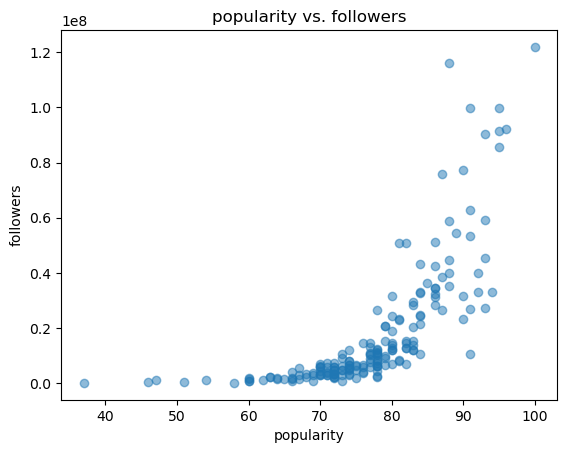

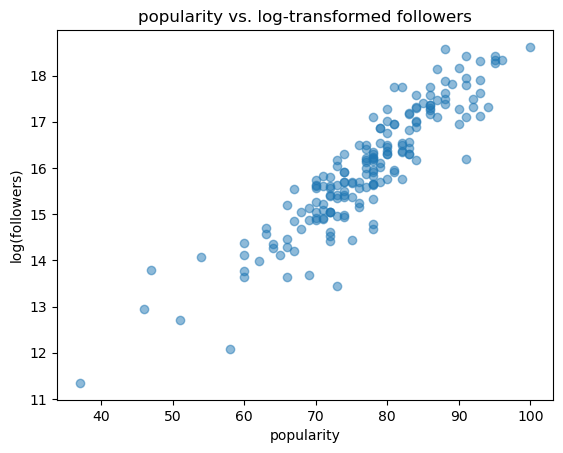

            popularity  followers
popularity    1.000000   0.713214
followers     0.713214   1.000000
               popularity  log_followers
popularity        1.00000        0.90914
log_followers     0.90914        1.00000


In [6]:
# week2 exercise 2.4

import numpy as np
from tqdm import tqdm


# Exercise 2.4
tqdm.pandas()
get_artist_data_feature(search_for_artist(token,'AQUA'), 'name')


# 1
df_artists = pd.DataFrame(index=unique_artists)
# get metadata for each artist using the search_for_artist function
df_artists['meta_data_artist'] = df_artists.index.map(lambda artist: search_for_artist(token, artist))

# create columns for artist features
df_artists['name'] = df_artists['meta_data_artist'].map(lambda x: get_artist_data_feature(x, 'name'))
df_artists['id'] = df_artists['meta_data_artist'].map(lambda x: get_artist_data_feature(x, 'id'))
df_artists['genres'] = df_artists['meta_data_artist'].map(lambda x: get_artist_data_feature(x, 'genres'))
df_artists['followers'] = df_artists['meta_data_artist'].map(lambda x: get_artist_data_feature(x, 'followers'))
df_artists['popularity'] = df_artists['meta_data_artist'].map(lambda x: get_artist_data_feature(x, 'popularity'))

# 2
# identify mismatches
mismatches = df_artists[df_artists['name'] != df_artists.index]
for index, row in mismatches.iterrows():
    print(f"index: {index} | meta data name: {row['name']}")
    df_artists.index = df_artists.index.where(df_artists.index != index, row['name'])
    
df_artists = df_artists.drop(columns=['name'])
display(df_artists)


# 3
# plot popularity vs. followers
plt.scatter(df_artists['popularity'], df_artists['followers'], alpha=0.5)
plt.title('popularity vs. followers')
plt.xlabel('popularity')
plt.ylabel('followers')
plt.show()

# log transform followers & plot
df_artists['log_followers'] = np.log1p(df_artists['followers'])
plt.scatter(df_artists['popularity'], df_artists['log_followers'], alpha=0.5)
plt.title('popularity vs. log-transformed followers')
plt.xlabel('popularity')
plt.ylabel('log(followers)')
plt.show()

correlation = df_artists[['popularity', 'followers']].corr()
print(correlation)
log_correlation = df_artists[['popularity', 'log_followers']].corr()
print(log_correlation)

> `Exercise 2.5`:
> **OBS! No need to run this on an entire dataset, show your work and demonstrate it on a toy example**
>
> 5. Does your dataset contain any duplicates (on `song_id`)? The first artist in `track_artist_name` is the track's primary artist. Drop duplicates keeping only the datapoint for the primary artist (where `artist_name` is equal to the primary artist). This is important for the machine learning next week!

#### Helping code

In [7]:
# Exercise 2.5.1:
def get_top_tracks_artist(token, artist_id):
    #TODO: Finish the function.
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
    headers = {'Authorization': f'Bearer {token}'}
    
    result = get(url, headers=headers)
    
    if result.status_code == 200:
        json_result = result.json()
        return json_result  # Returns the JSON response containing tracks
    else:
        print(f"Error {result.status_code}: {result.reason}")
        return None

# Exercise 2.5.2: 
# get Taylor Swift's ID
TSID = df_artists.loc['Taylor Swift']['id']
TS_top_tracks = get_top_tracks_artist(token, TSID)
print(f"number of top tracks: {len(TS_top_tracks['tracks'])}")
print(f"Taylor Swift's top song: {TS_top_tracks['tracks'][0]['name']}")

# Exercise 2.5.3:
# TODO: Initializing the df_tracks DataFrame with the columns described
df_tracks = pd.DataFrame(columns=['artist_name', 'track_id', 'track_name', 'track_artists_name',
                                  'track_artists_id', 'track_release_date', 'track_popularity',
                                  'track_explicit', 'track_album_type'])


# Exercise 2.5.4:
# A helper function that returns the track data as a dictionary.
def extract_track_data(track):
    return {
        'track_id': track['id'],
        'track_name': track['name'],
        'track_artists_name': [artist['name'] for artist in track['artists']],
        'track_artists_id': [artist['id'] for artist in track['artists']],
        'track_release_date': track['album']['release_date'],
        'track_popularity': track['popularity'],
        'track_explicit': track['explicit'],
        'track_album_type': track['album']['album_type']
    }


# df_list
df_list = [] # can be used when concat is not inside the loop

# Suggestion to get started (you can also used .concat)
for artist in tqdm(df_artists.index):
    
    # get the artist id
    # hint: use .iloc() introduced in week1
    artist_id = df_artists.loc[artist]['id']
    
    #TODO: Finish the rest.
    top_tracks_json = get_top_tracks_artist(token, artist_id)
    if top_tracks_json and 'tracks' in top_tracks_json:
        for track in top_tracks_json['tracks']:
            track_data = extract_track_data(track)
            track_data['artist_name'] = artist
            df_list.append(track_data)

number of top tracks: 10
Taylor Swift's top song: Cruel Summer


 23%|█████████▊                                | 42/180 [00:07<00:20,  6.59it/s]

Error 400: Bad Request


 65%|██████████████████████████▋              | 117/180 [00:21<00:09,  6.44it/s]

Error 400: Bad Request


100%|█████████████████████████████████████████| 180/180 [00:31<00:00,  5.64it/s]


#### Answer

In [8]:
# add df_list to df_tracks dataset
df_tracks = pd.DataFrame(df_list)
# drop duplicate tracks
df_tracks = df_tracks.drop_duplicates(subset='track_id', keep='first')
df_tracks = df_tracks[['artist_name', 'track_id', 'track_name', 'track_artists_name', 
                       'track_artists_id', 'track_release_date', 'track_popularity', 
                       'track_explicit', 'track_album_type']]

display(df_tracks)

,artist_name,track_id,track_name,track_artists_name,track_artists_id,track_release_date,track_popularity,track_explicit,track_album_type
0,Metallica,5sICkBXVmaCQk5aISGR3x1,Enter Sandman,[Metallica],[2ye2Wgw4gimLv2eAKyk1NB],1991-08-12,81,False,album
1,Metallica,0nLiqZ6A27jJri2VCalIUs,Nothing Else Matters,[Metallica],[2ye2Wgw4gimLv2eAKyk1NB],1991-08-12,80,False,album
2,Metallica,2MuWTIM3b0YEAskbeeFE1i,Master Of Puppets,[Metallica],[2ye2Wgw4gimLv2eAKyk1NB],1986-03-03,77,False,album
3,Metallica,3LpHzQU2CZzZJGdUWV79SI,For Whom The Bell Tolls - Remastered,[Metallica],[2ye2Wgw4gimLv2eAKyk1NB],1984-07-26,71,False,album
4,Metallica,5IX4TbIR5mMHGE4wiWwKW0,One,[Metallica],[2ye2Wgw4gimLv2eAKyk1NB],1988-08-25,73,False,album
...,...,...,...,...,...,...,...,...,...
1775,TLC,2W2vmNmTLERMWT9XBxm35E,Diggin' On You,[TLC],[0TImkz4nPqjegtVSMZnMRq],1994-11-15,54,False,album
1776,TLC,1zTuB57LYZa7xu7KUH8kF0,Baby-Baby-Baby,[TLC],[0TImkz4nPqjegtVSMZnMRq],1992-02-25,51,False,album
1777,TLC,63PIgPkDf3rswlU4ZWCYAM,What About Your Friends,[TLC],[0TImkz4nPqjegtVSMZnMRq],1992-02-25,50,False,album
1778,TLC,76fn6jLgMwrQDS08ACFIU1,Waterfalls - Single Edit,[TLC],[0TImkz4nPqjegtVSMZnMRq],1995-05-29,44,False,single


## Week3

>**Exercise 3.6: Compare the models and their evaluation metrics.** Analyze the differences between the original model and the recreated one by comparing the plots and metrics obtained from both. What do the results tell us? Can we be sure that one model is better than the other from this one experiment?
>
>*You can plot the origianl model vs. the log-transformed model using subplots template below.*

#### Helping code

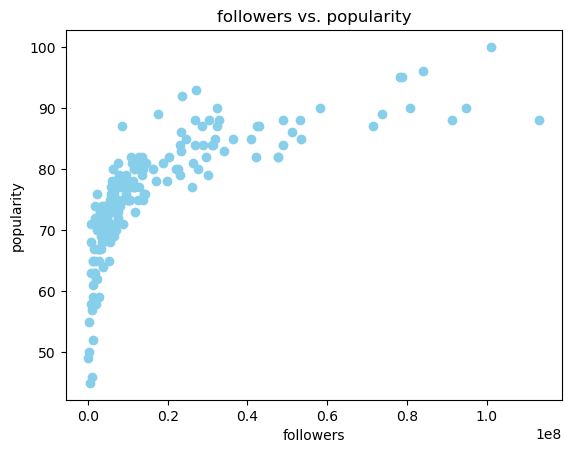

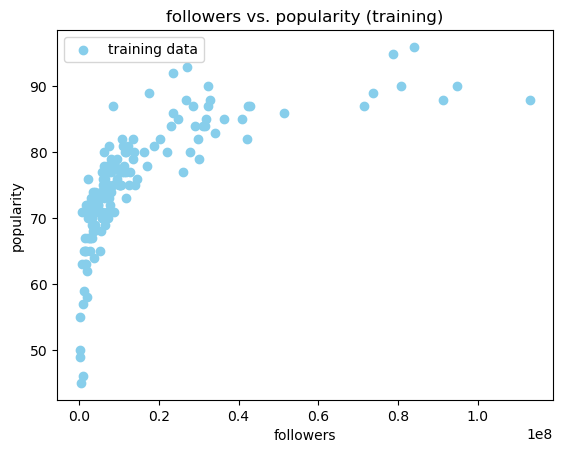

MSE: 33.00302798022358


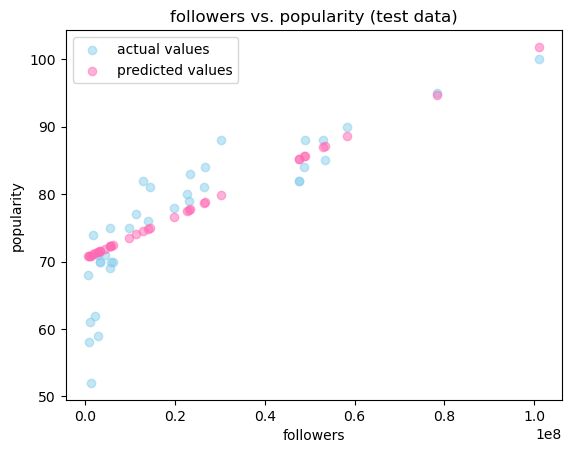

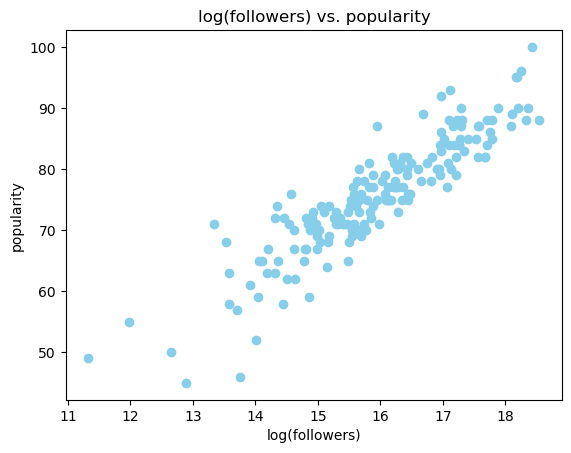

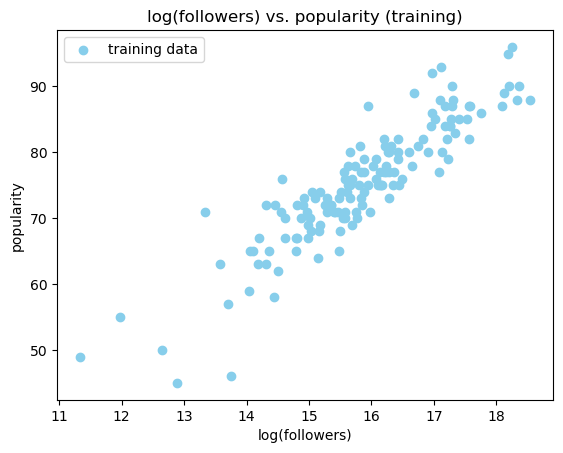

MSE w/ log transformation: 19.14867687854016


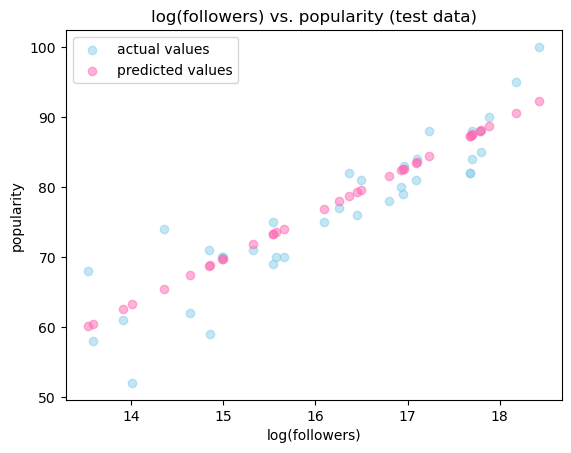

In [9]:
# Start by importing the libraries we want to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# load the artist data from the csv file
df_artists = pd.read_csv('df_artists.csv')

# create feature matrix and target vector
X = df_artists[['followers']]
y = df_artists['popularity']

# create scatterplot with followers & popularity
plt.scatter(X, y, color = 'skyblue')
plt.title('followers vs. popularity')
plt.xlabel('followers')
plt.ylabel('popularity')
plt.show()

# use train_test_split to split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# visualize training data
plt.scatter(X_train, y_train, label='training data', c='skyblue')
plt.title('followers vs. popularity (training)')
plt.xlabel('followers')
plt.ylabel('popularity')
plt.legend()
plt.show()

# define the evaluation metric as the MSE and calculate it for the testing data
y_pred = model.predict(X_test)
E = mean_squared_error(y_test, y_pred)
print(f'MSE: {E}')

# create scatterplot of test data with predicted & actual values
plt.scatter(X_test, y_test, label='actual values', c='skyblue', alpha = 0.5)
plt.scatter(X_test, y_pred, c='hotpink', label='predicted values', alpha=0.5)
plt.title('followers vs. popularity (test data)')
plt.xlabel('followers')
plt.ylabel('popularity')
plt.legend()
plt.show()

# repeat the process using the log-transformed feature
X_log = np.log1p(X)

# visualization of log transformation
plt.scatter(X_log, y, c = 'skyblue')
plt.title('log(followers) vs. popularity')
plt.xlabel('log(followers)')
plt.ylabel('popularity')
plt.show()

# split data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
log_model = LinearRegression()
log_model.fit(X_train_log, y_train_log)

# visualize training data
plt.scatter(X_train_log, y_train_log, label='training data', c='skyblue')
plt.title('log(followers) vs. popularity (training)')
plt.xlabel('log(followers)')
plt.ylabel('popularity')
plt.legend() 
plt.show()

# make predictions & calculate MSE
y_pred_log = log_model.predict(X_test_log)
E_log = mean_squared_error(y_test, y_pred_log)
print(f'MSE w/ log transformation: {E_log}')

# visualize test data with predicted and actual values
plt.scatter(X_test_log, y_test_log, label='actual values', c='skyblue', alpha=0.5)
plt.scatter(X_test_log, y_pred_log, label='predicted values', c='hotpink', alpha=0.5)
plt.title('log(followers) vs. popularity (test data)')
plt.xlabel('log(followers)')
plt.ylabel('popularity')
plt.legend()
plt.show()

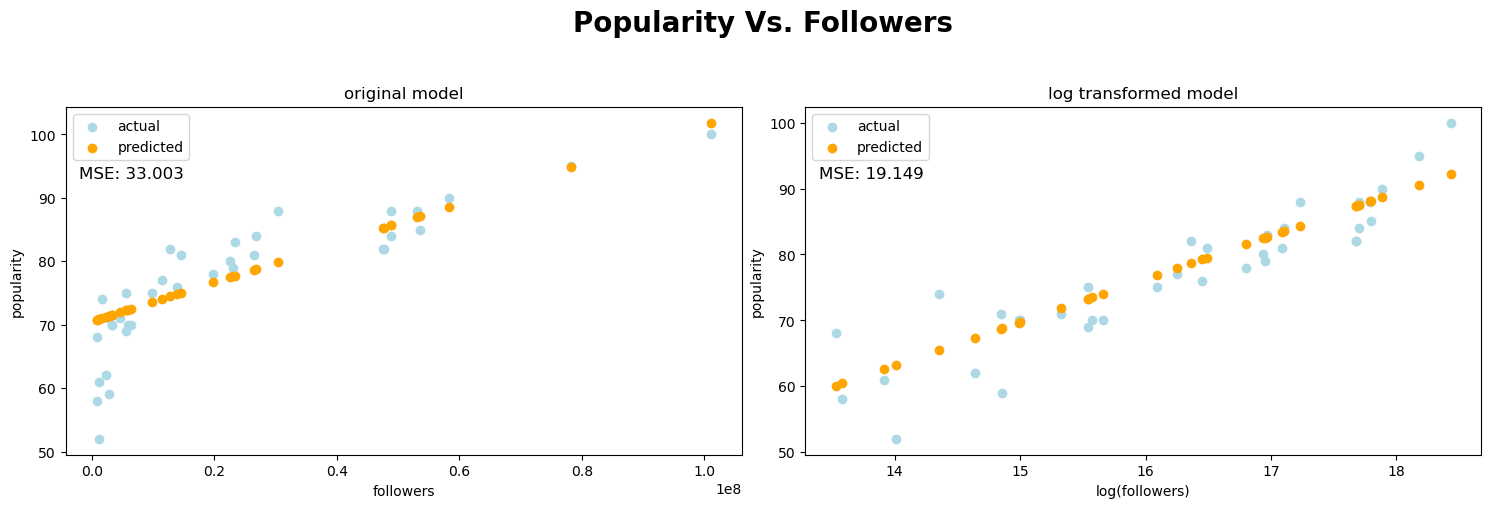

In [11]:
# week1 exercise 3.6
# Subplot template for two figures next to each other
fig, (ax_model, ax_log_model) = plt.subplots(1, 2, figsize=(15, 5)) # 1 row, 2 columns and a figure size of 15x5

# make figure text
fig.suptitle('Popularity Vs. Followers\n', fontsize=20, fontweight='bold')

# add more space 
fig.tight_layout(pad=1.5)

# plot the first subplot: original model
ax_model.scatter(X_test, y_test, color='lightblue', label = 'actual')
ax_model.scatter(X_test, y_pred, color='orange', label = 'predicted')
ax_model.set_title('original model')
ax_model.set_xlabel('followers')
ax_model.set_ylabel('popularity')
ax_model.legend()
# add MSE value
ax_model.text(0.02, 0.83, f'MSE: {E:.3f}', transform = ax_model.transAxes, fontsize=12, verticalalignment='top')

# plot the second subplot: log transformed model
ax_log_model.scatter(X_test_log, y_test, color = 'lightblue', label = 'actual')
ax_log_model.scatter(X_test_log, y_pred_log, color = 'orange', label = 'predicted')
ax_log_model.set_title('log transformed model')
ax_log_model.set_xlabel('log(followers)')
ax_log_model.set_ylabel('popularity')
ax_log_model.legend()
# add MSE value
ax_log_model.text(0.02, 0.83, f'MSE: {E_log:.3f}', transform = ax_log_model.transAxes, fontsize=12, verticalalignment='top')

# you can get the predicted values from the model by using model_log.predict(X_log)
plt.show()